Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [5]:
customer_df = pd.read_csv("/Users/laura.chavez/Documents/GitHub/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

First, look at its main features (head, shape, info).

In [16]:
customer_df.head(5)

customer       state  customer_lifetime_value response  coverage education   
0  BU79786  Washington              2763.519279       No     Basic  Bachelor  \
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income  ...   
0        2011-02-24         Employed      F   56274  ...  \
1        2011-01-31       Unemployed      F       0  ...   
2        2011-02-19         Employed      F   48767  ...   
3        2011-01-20       Unemployed      M       0  ...   
4        2011-02-03         Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies   
0                             5                         0                   1  \
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      policy_type        policy  renew_offer_type  sales_channel   
0  Corporate Auto  Corporate L3            Offer1          Agent  \
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  total_claim_amount  vehicle_class vehicle_size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [7]:
customer_df.shape

(9134, 24)

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

Rename the columns so they follow the PE8 (snake case).

In [9]:
new_cols=[]
for col in customer_df.columns:
    new_col = col.lower().replace(' ', '_')
    new_cols.append(new_col)
new_cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [10]:
customer_df.columns=new_cols

Fix the data types of any other column/columns as you might see necessary. 

In [13]:
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date)

/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_11857/3853592334.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date)


Plot a correlation matrix, and comment on what you observe.

In [19]:
df_num = customer_df.select_dtypes(exclude='object')
df_num.columns

Index(['customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [20]:
corr=df_num.corr()

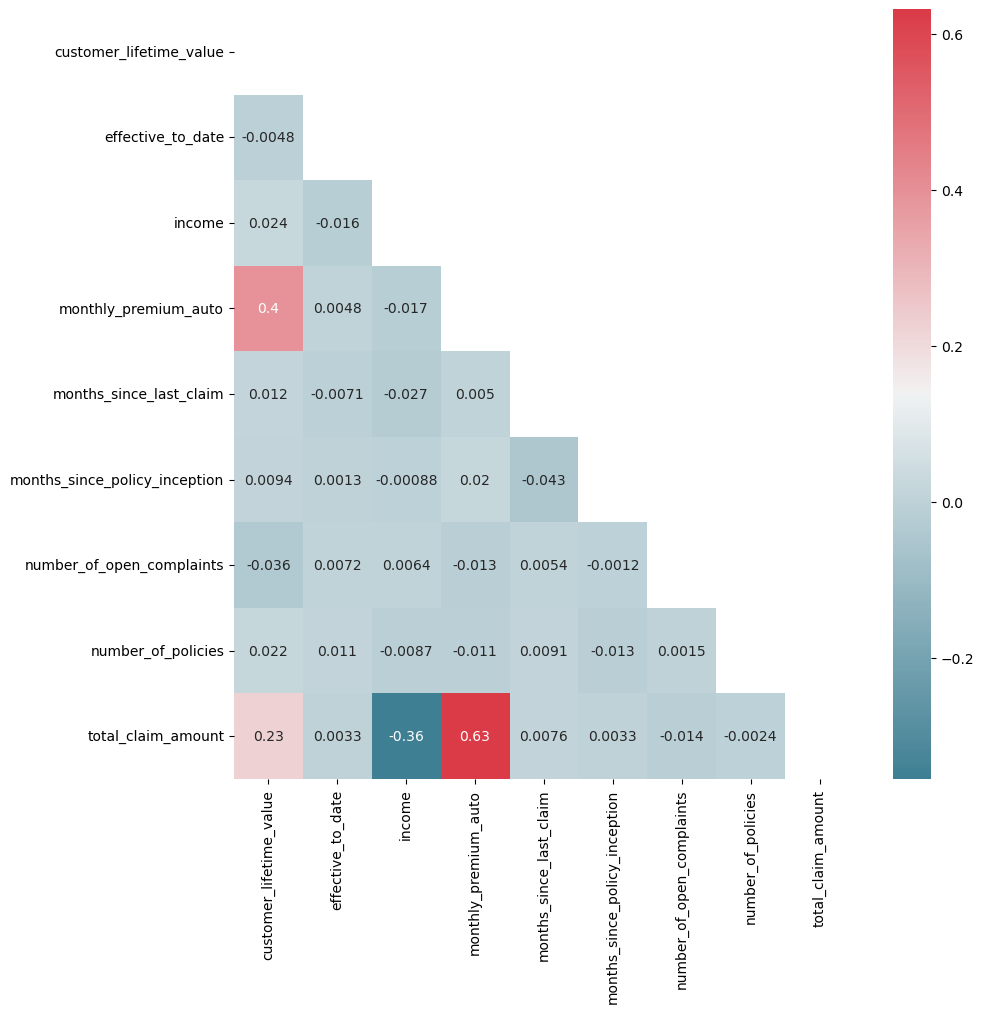

In [22]:
mask=np.triu(np.ones_like(corr, dtype=bool))     

f, ax=plt.subplots(figsize=(10, 10))                 

cmap=sns.diverging_palette(220, 10, as_cmap=True)   

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.show()

No existe una marcada correlación entre las variables numéricas, la mayor es la relación entre la prima del auto vs el monto de la reclamación

Plot every continuous variable. Comment what you can see in the plots.

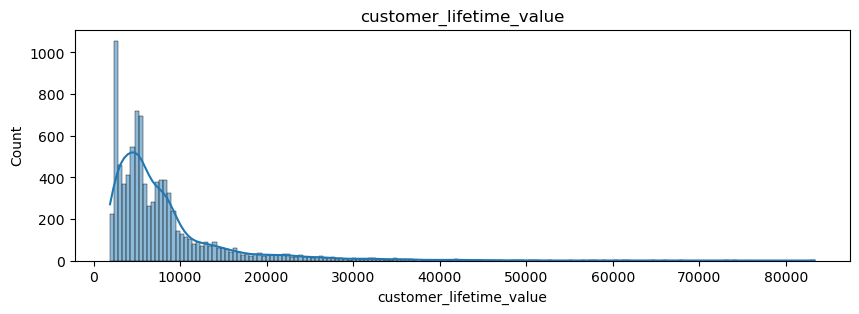

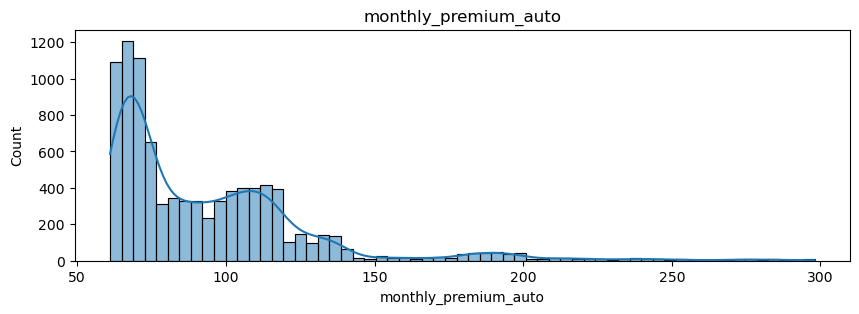

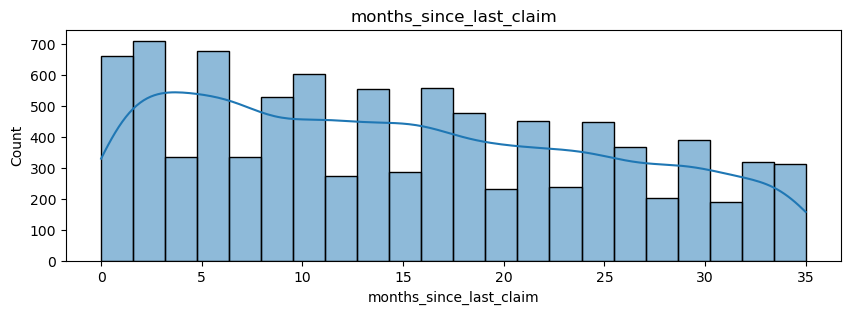

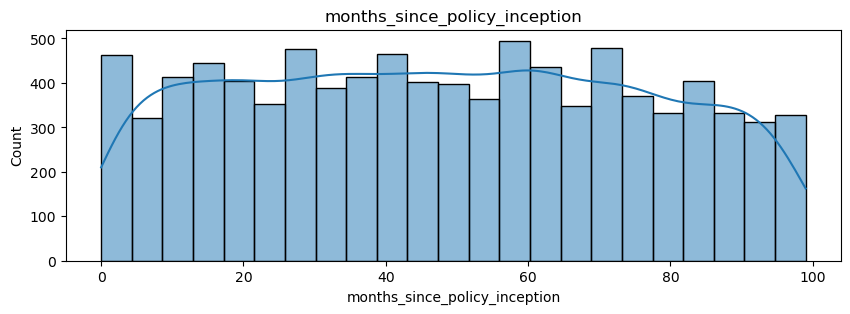

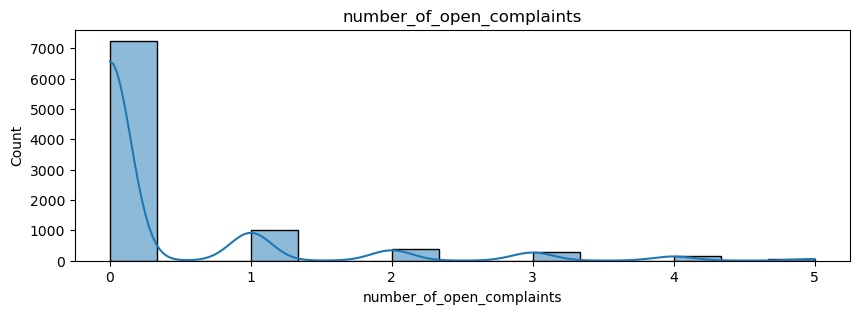

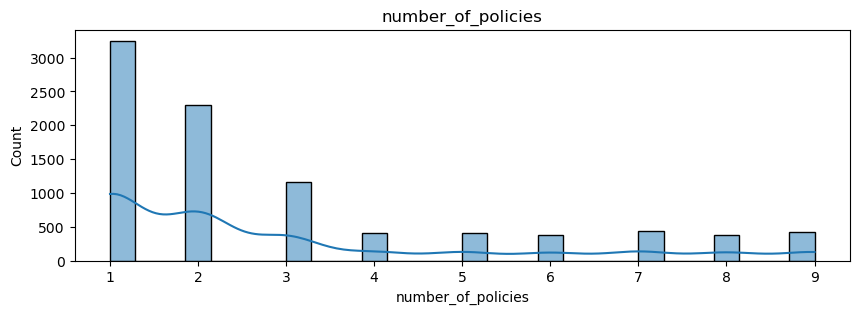

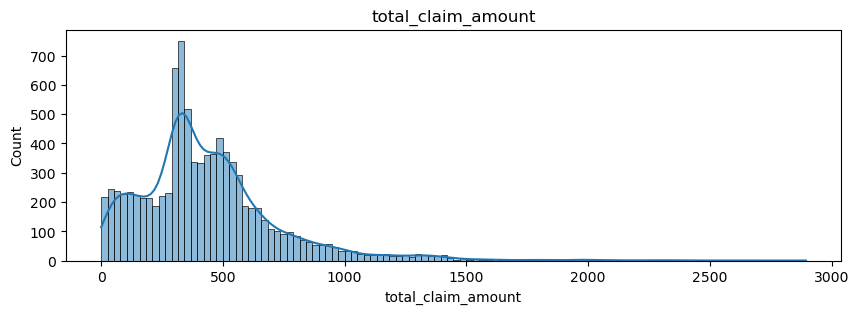

In [24]:
for c in df_num.columns:
    plt.figure(figsize=(10,3))
    sns.histplot(df_num[c], kde=True)
    plt.title(c)
    plt.show()

Muy pocas de las variables tienen un comportamiento normal, la mayoría presentan cesgos a la izquierda, por lo que habría que trabajar con outliers

Do the same with the categorical variables

In [27]:
cat_df = customer_df.select_dtypes('object')

cat_df.drop('customer',axis=1, inplace=True)

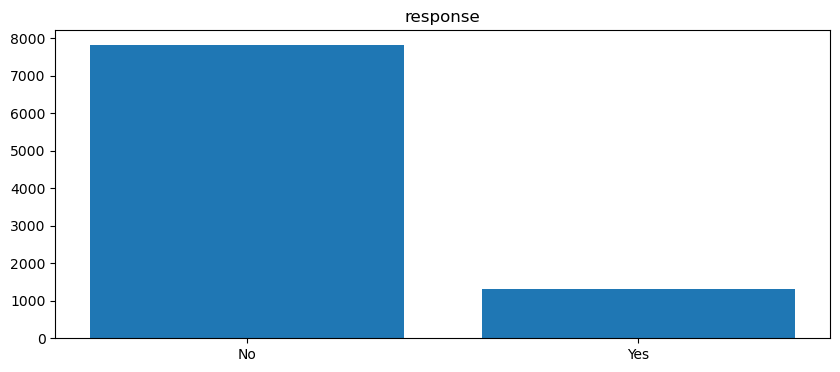

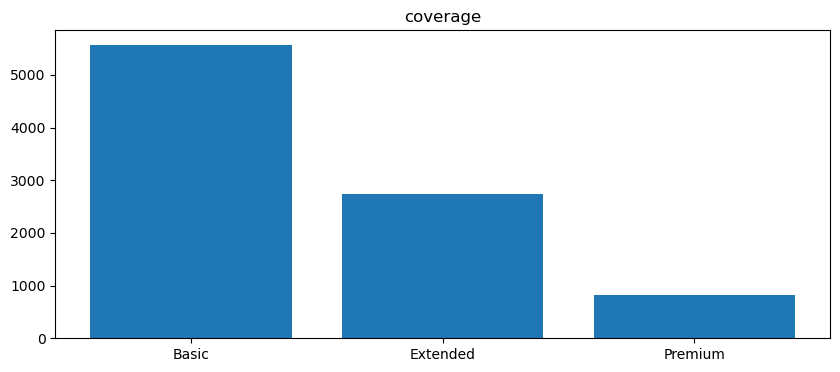

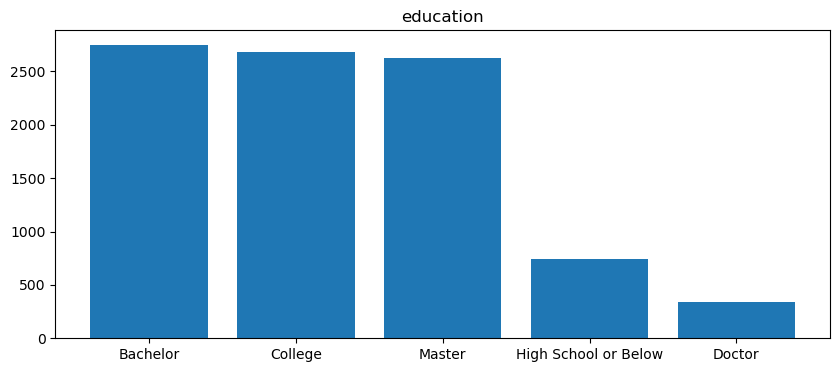

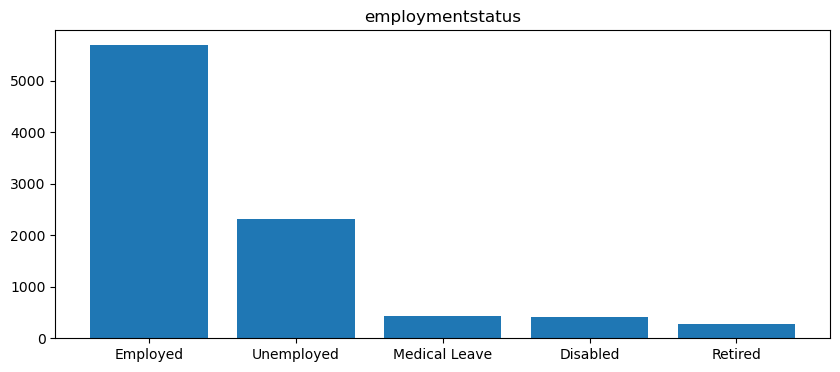

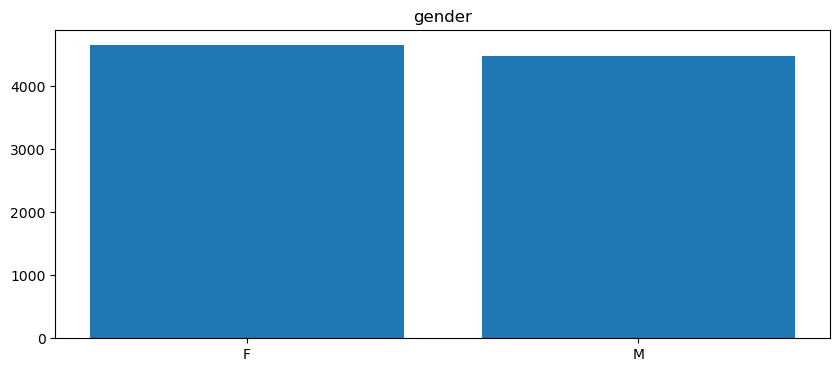

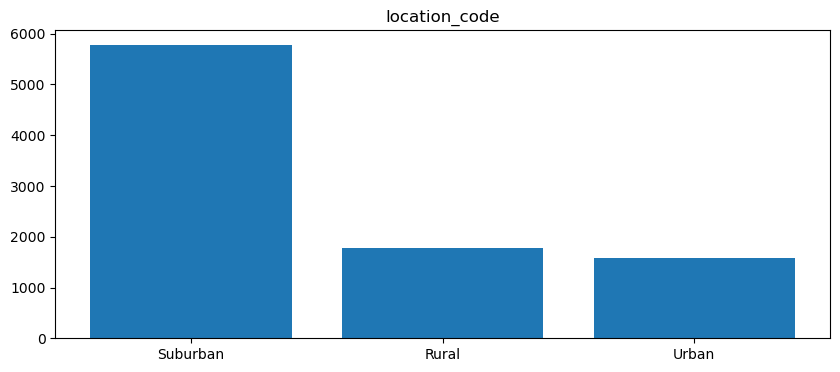

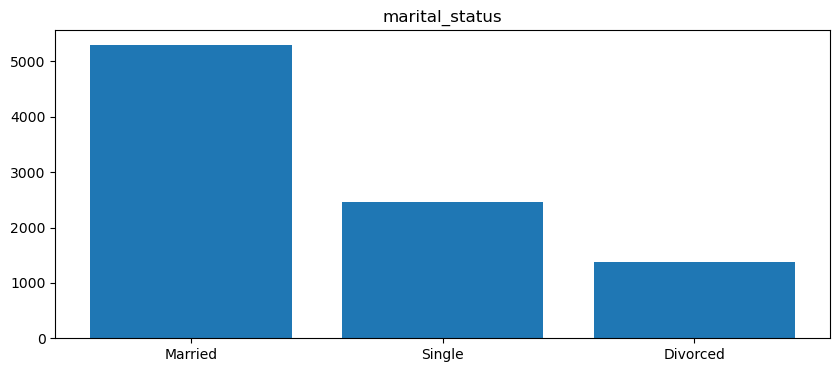

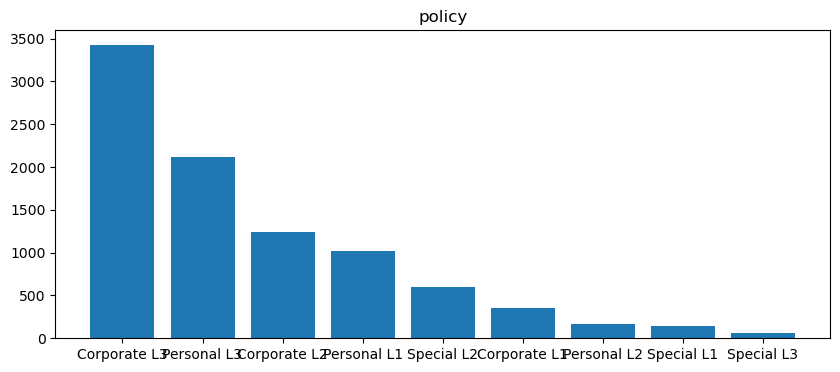

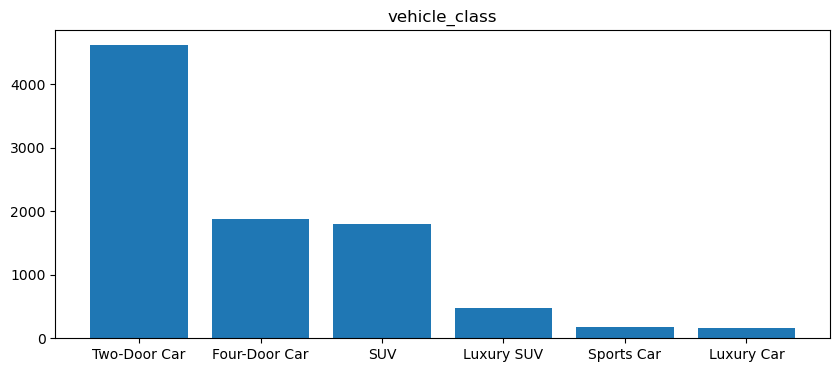

In [30]:
for c in cat_df.columns:
    plt.figure(figsize=(10,4))
    plt.bar(cat_df[c].unique(),cat_df[c].value_counts())
    plt.title(c)
    plt.show()

Check all columns for NaN values

In [31]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64